In [679]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### The data

In [680]:
train=pd.read_csv('train_users_2.csv')

In [681]:
os.getcwd()

'/Users/amandaxiao/Desktop/Dataset'

In [682]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/10,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/11,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/10,2.009060e+13,8/2/10,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/11,2.009100e+13,9/8/12,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/10,2.009120e+13,2/18/10,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [683]:
train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013083e+13,49.668335,3.267387
std,9.253690e+09,155.666612,7.637707
min,2.009030e+13,1.000000,0.000000
25%,2.012120e+13,28.000000,0.000000
50%,2.013090e+13,34.000000,0.000000
75%,2.014030e+13,43.000000,0.000000
max,2.014060e+13,2014.000000,25.000000


In [684]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  float64
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [685]:
train.isnull().sum()
# date_first_booking has 124543 NaN; 
#87990 NaN for Age value; 
#first_affiliate_tracked 6065;

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [686]:
# There is a abnormal value in the age column.

In [687]:
train.nunique()

id                         213451
date_account_created         1634
timestamp_first_active         59
date_first_booking           1976
gender                          4
age                           127
signup_method                   3
signup_flow                    17
language                       25
affiliate_channel               8
affiliate_provider             18
first_affiliate_tracked         7
signup_app                      4
first_device_type               9
first_browser                  52
country_destination            12
dtype: int64

In [688]:
train['country_destination'].value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

### EDA

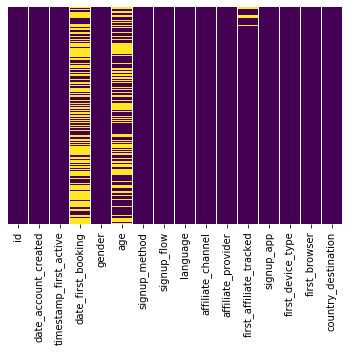

In [689]:
# Plot missing value for each column
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Data preprocessing

### 1. Country_destination

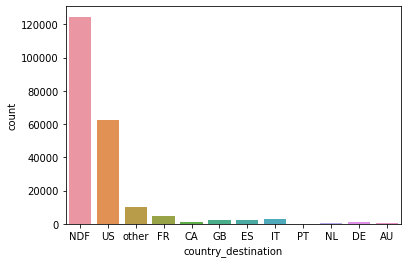

In [690]:
sns.countplot(x='country_destination', data=train)
#We can divide the country_destination into 3 category: NDF, US, Outside US

In [691]:
# This is a function to categorize destination
# require input: a column of countries
# output: a new col of categorized countries
def destination_category(country):
    if country!='NDF' and country!='US':
        country='Outside US'
    return country

train['country']=train['country_destination'].apply(destination_category)
# def modify_destination_category(countries):
#     for country in countries:
#         if (country != 'NDF') and (country != 'US'):
#             country = 'Outside US'
         

In [692]:
train[['country','country_destination']].head(20)
# countries = train['country_destination'][0:10]
# print(type(countries))
# print(countries)

# newCol = destination_category(countries)
# print(newCol)
# modify_destination_category(train['country_destination'][0:10])


,country,country_destination
0,NDF,NDF
1,NDF,NDF
2,US,US
3,Outside US,other
4,US,US
5,US,US
6,US,US
7,US,US
8,US,US
9,US,US


213451


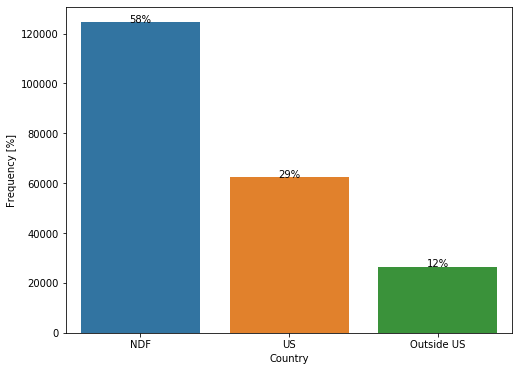

In [693]:
from matplotlib.pyplot import show
ncount=len(train['country'])
print(ncount)
plt.figure(figsize=(8,6))
cpt=sns.countplot(x='country', data=train)
plt.title="Destination distribution"
plt.xlabel("Country")
plt.ylabel("Frequency [%]")

for p in cpt.patches:
    height = p.get_height()
    cpt.text(x=p.get_x()+p.get_width()/2,
            y=height + 3,
            s='{:1.0f}%'.format((height/ncount)*100),
            ha="center") 
show()

### 2. Gender

In [694]:
# replace -unknown- with Null value

In [695]:
train['gender'].value_counts()
train['gender']=train['gender'].replace('-unknown-',np.nan)

In [696]:
train['gender'].value_counts(dropna=False)

NaN       95688
FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

#### 2.1 country='NDF'

In [697]:
# Fill the -unknown- value in gender column based on proport in each country
# country= NDF
# logic: Find all country=NDF, find the percentage for each gender category.
# 筛选出所有的country=NDF的records, gender有null，male female other, 现在需要根据male female other的比例
#按比例给unknown填充进去gender的值
df_ndf=train[train['country']=='NDF']
df_ndf['gender'].value_counts(dropna=False)

NaN       66670
FEMALE    31048
MALE      26719
OTHER       106
Name: gender, dtype: int64

In [698]:
# Find proportion o each gender
# Total counts of non-null value:
not_null=df_ndf[df_ndf['gender'].notnull()]['gender']
not_null.value_counts(normalize=True)
# The proportion of each gender:
not_null.value_counts()/not_null.count()

 

FEMALE    0.536485
MALE      0.461683
OTHER     0.001832
Name: gender, dtype: float64

In [699]:
# extract the index of nan value in gender column
nan_row_index_list=df_ndf[df_ndf['gender'].isnull()].index
nan_row_index_list

Int64Index([     0,     16,     18,     23,     26,     32,     35,     38,
                43,     48,
            ...
            213435, 213436, 213437, 213438, 213442, 213444, 213447, 213448,
            213449, 213450],
           dtype='int64', length=66670)

In [700]:
# generate the gender value that will be fill the nan value
filled_value=pd.Series(np.random.choice(
            ['FEMALE', 'MALE','OTHER'],
            p=[0.536, 0.462,0.002], 
            size=len(nan_row_index_list)))
filled_value

0        FEMALE
1          MALE
2        FEMALE
3        FEMALE
4        FEMALE
          ...  
66665      MALE
66666      MALE
66667    FEMALE
66668      MALE
66669    FEMALE
Length: 66670, dtype: object

In [701]:
# Insert the new produced value into null
i = 0
for idx in nan_row_index_list:
    df_ndf.at[idx, 'gender'] = filled_value[i]
    i = i + 1
    
df_ndf['gender'].value_counts(dropna=False)

FEMALE    66852
MALE      57439
OTHER       252
Name: gender, dtype: int64

In [702]:
train[train['country']=='NDF']=df_ndf
train[train['country']=='NDF']['gender'].value_counts()

FEMALE    66852
MALE      57439
OTHER       252
Name: gender, dtype: int64

In [703]:
train[train['country']=='NDF']=df_ndf

#### 2.2 country='US'

In [704]:
df_us=train[train['country']=='US']
# Calculate the proportion for each non null gender
df_us[df_us['gender'].notnull()]['gender'].value_counts(normalize=True)
#df_us[df_us['gender'].notnull()]['gender'].value_counts()

FEMALE    0.536920
MALE      0.460335
OTHER     0.002744
Name: gender, dtype: float64

In [705]:
us_nan_row_index=df_us[df_us['gender'].isnull()].index
us_nan_row_index

Int64Index([     4,      5,      9,     17,     20,     22,     29,     47,
                49,     51,
            ...
            213294, 213329, 213340, 213343, 213373, 213376, 213398, 213405,
            213406, 213410],
           dtype='int64', length=20109)

In [706]:
us_filled_value=pd.Series(np.random.choice(
            ['FEMALE', 'MALE','OTHER'],
            p=[0.537, 0.460,0.003], 
            size=len(us_nan_row_index)))
us_filled_value

0        FEMALE
1          MALE
2          MALE
3        FEMALE
4          MALE
          ...  
20104      MALE
20105      MALE
20106    FEMALE
20107      MALE
20108    FEMALE
Length: 20109, dtype: object

In [707]:
i=0
for idx in us_nan_row_index:
    df_us.at[idx,'gender']=us_filled_value[i]
    i=i+1
df_us['gender'].value_counts(dropna=False)

FEMALE    33513
MALE      28700
OTHER       163
Name: gender, dtype: int64

In [708]:
train[train['country']=='US']=df_us

#### 2.3 country='Outside US'

In [709]:
df_outside_us=train[train['country']=='Outside US']
#print(df_outside_us)
df_outside_us['gender'].value_counts()/df_outside_us[df_outside_us['gender'].notnull()]['gender'].count()
df_outside_us['gender'].value_counts(normalize=True)

FEMALE    0.527663
MALE      0.468933
OTHER     0.003405
Name: gender, dtype: float64

In [710]:
outside_us_row_index=df_outside_us['gender'].isnull().index
outside_us_row_index

Int64Index([     3,     12,     15,     19,     25,     28,     30,     44,
                46,     57,
            ...
            213371, 213372, 213388, 213390, 213400, 213401, 213404, 213407,
            213415, 213441],
           dtype='int64', length=26532)

In [711]:
outside_us_filled_value=pd.Series(np.random.choice(['FEMALE','MALE','OTHER'], 
                                                   p=[0.528,0.469,0.003], size=len(outside_us_row_index)))
outside_us_filled_value

0          MALE
1          MALE
2          MALE
3          MALE
4        FEMALE
          ...  
26527    FEMALE
26528      MALE
26529      MALE
26530      MALE
26531      MALE
Length: 26532, dtype: object

In [712]:
#Fill in the value
i = 0
for idx in outside_us_row_index:
    df_outside_us.at[idx,'gender']=outside_us_filled_value[i]
    i=i+1

df_outside_us['gender'].value_counts(dropna=False)

FEMALE    14110
MALE      12352
OTHER        70
Name: gender, dtype: int64

In [713]:
train[train['country']=='Outside US']=df_outside_us

In [714]:
train['gender'].value_counts()
# All the null in gender has been replaced with female, male, other proportionally.

FEMALE    114475
MALE       98491
OTHER        485
Name: gender, dtype: int64

In [715]:
train[train['country']=='Outside US']=df_outside_us

### 3. Age

In [716]:
train[train['age'].isnull()]['age'].count

<bound method Series.count of 0        NaN
5        NaN
12       NaN
16       NaN
18       NaN
          ..
213442   NaN
213444   NaN
213447   NaN
213449   NaN
213450   NaN
Name: age, Length: 87990, dtype: float64>

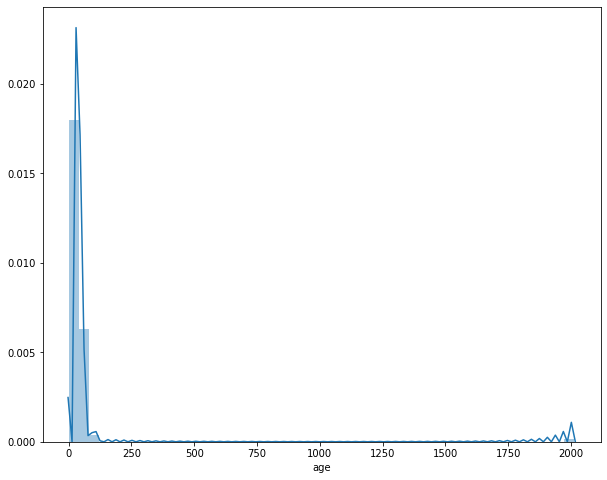

In [717]:
plt.figure(figsize=(10,8))
sns.distplot(train['age'])
# We can see there are some data point appear at around 1750

In [718]:
train[train['age']>=1750]['age']
index=train[train['age']>=1750]['age'].index
index

for i in index:
    train.at[i,'age']=2017-train.at[i,'age']

train['age'].describe()

count    125461.000000
mean         37.217876
std          14.180990
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max         150.000000
Name: age, dtype: float64

In [719]:
# Fill in the null and outlier with mean of age which is between 10 and 100
age_not_null=train[train['age'].notnull()]
ten_hundred=age_not_null[(age_not_null['age']>=10) & (age_not_null['age']<=100)]
age_mean=round(ten_hundred['age'].mean(),0)
print(age_mean)

train.loc[(train['age']<10) | (train['age']>100), 'age'] = np.nan

train['age']=train['age'].fillna(age_mean)

37.0


In [720]:
# Divide age into groups:
bins=[0,15,26,37,48,59,70,81,90,100]
labels=['0~14','15~25','26~36','37~47','48~58','59~69','70~80','81~91','>92']

train['age_group']=pd.cut(train['age'], bins=bins, labels=labels, right=False)

### 4. Affiliate_provider & first_brower

In [721]:
columns=['signup_method','signup_flow','language','affiliate_channel',
   'affiliate_provider','first_affiliate_tracked','signup_app',
   'first_device_type','first_browser']
for i in columns:
    print(train[i].value_counts(dropna=False))

basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64
0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64
direct           137727
sem-brand         26045
sem-non-brand     18844
other              8961
seo                8663
api                8167
content            3948
remarketing        1096
Name: affiliate_channel, dtype: int64
direct                 137426
google                  51693
other       

<function matplotlib.pyplot.show(*args, **kw)>

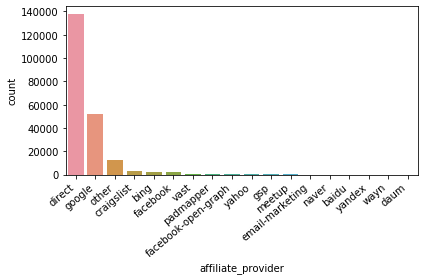

In [722]:
ax=sns.countplot(train['affiliate_provider'],
                 order = train['affiliate_provider'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation =40, ha='right')
plt.tight_layout()
plt.show

So I decided to keep direct to facebook and put others as other since the data set is too small.

In [723]:
#train['affiliate_provider'].index
for i in train['affiliate_provider'].index:
    if train.at[i,'affiliate_provider']=='direct':
        train.at[i,'affiliate_prov_group']='direct'
    elif train.at[i,'affiliate_provider']=='google':
        train.at[i,'affiliate_prov_group']='google'
    elif train.at[i,'affiliate_provider']=='craigslist':
        train.at[i,'affiliate_prov_group']='craigslist'
    elif train.at[i,'affiliate_provider']=='bing':
        train.at[i,'affiliate_prov_group']='bing'
    elif train.at[i,'affiliate_provider']=='facebook':
        train.at[i,'affiliate_prov_group']='facebook'
    else:
        train.at[i,'affiliate_prov_group']='other'

In [724]:
train['affiliate_prov_group'].value_counts()

direct        137426
google         51693
other          16260
craigslist      3471
bing            2328
facebook        2273
Name: affiliate_prov_group, dtype: int64

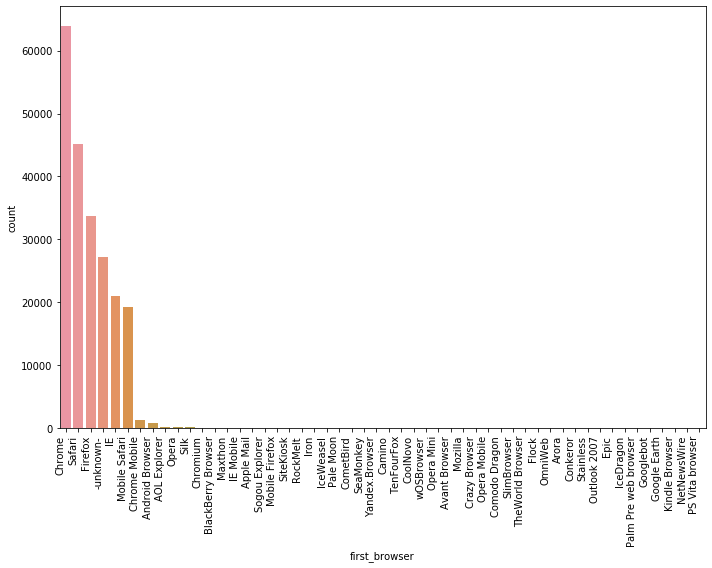

In [725]:
plt.figure(figsize=(10,8))
ax=sns.countplot(train['first_browser'],
                 order=train['first_browser'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [726]:
for i in train['first_browser'].index:
    if train.at[i,'first_browser']=='Chrome':
        train.at[i,'first_browser_group']='Chrome'
    elif train.at[i,'first_browser']=='Safari':
        train.at[i,'first_browser_group']='Safari'
    elif train.at[i,'first_browser']=='Firefox':
        train.at[i,'first_browser_group']='Firefox'
    elif train.at[i,'first_browser']=='IE':
        train.at[i,'first_browser_group']='IE'
    elif train.at[i,'first_browser']=='Mobile Safari':
        train.at[i,'first_browser_group']='Mobile Safari'
    elif train.at[i,'first_browser']=='Chrome Mobile':
        train.at[i,'first_browser_group']='Chrome Mobile'
    elif train.at[i,'first_browser']=='Android Browser':
        train.at[i,'first_browser_group']='Chrome Browser'
    elif train.at[i,'first_browser']=='-unknown-':
        train.at[i,'first_browser_group']=np.nan
    else:
        train.at[i,'first_browser_group']='Other'

In [727]:
train['first_browser_group'].value_counts(dropna=False)
browser_pct=train['first_browser_group'].value_counts()/train['first_browser_group'].count()
browser_pct

Chrome            0.342912
Safari            0.242603
Firefox           0.180761
IE                0.113156
Mobile Safari     0.103521
Chrome Mobile     0.006821
Other             0.005656
Chrome Browser    0.004571
Name: first_browser_group, dtype: float64

In [728]:
nan_browser_index_list=train[train['first_browser_group'].isnull()]['first_browser_group'].index

filled_columns=browser_pct.index
pct_values=browser_pct.values

browser_filled_value=pd.Series(np.random.choice(
            filled_columns,
            p=pct_values, 
            size=len(nan_browser_index_list)))
browser_filled_value

0         Safari
1          Other
2         Chrome
3         Chrome
4        Firefox
          ...   
27261     Chrome
27262         IE
27263     Chrome
27264     Chrome
27265     Safari
Length: 27266, dtype: object

In [729]:
i = 0
for idx in nan_browser_index_list:
    train.at[idx,'first_browser_group']=browser_filled_value[i]
    i=i+1

In [730]:
train['first_browser_group'].value_counts(dropna=False)

Chrome            73225
Safari            51869
Firefox           38472
IE                24130
Mobile Safari     22146
Chrome Mobile      1451
Other              1193
Chrome Browser      965
Name: first_browser_group, dtype: int64

Write the processed dataset into a new csv file

In [731]:
train.to_csv('train_users_3.csv')

### Data Visualization

In [738]:
del_columns=['id','date_account_created','timestamp_first_active','date_first_booking','age','affiliate_channel','first_browser','country_destination']
train=train.drop(del_columns, axis=1)
train

,gender,signup_method,signup_flow,language,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,country,age_group,affiliate_prov_group,first_browser_group
0,FEMALE,facebook,0,en,direct,untracked,Web,Mac Desktop,NDF,37~47,direct,Chrome
1,MALE,facebook,0,en,google,untracked,Web,Mac Desktop,NDF,37~47,google,Chrome
2,FEMALE,basic,3,en,direct,untracked,Web,Windows Desktop,US,48~58,direct,IE
3,MALE,facebook,0,en,direct,untracked,Web,Mac Desktop,Outside US,37~47,direct,Firefox
4,FEMALE,basic,0,en,direct,untracked,Web,Mac Desktop,US,37~47,direct,Chrome
...,...,...,...,...,...,...,...,...,...,...,...,...
213446,MALE,basic,0,en,google,omg,Web,Mac Desktop,NDF,26~36,google,Safari
213447,MALE,basic,0,en,direct,linked,Web,Windows Desktop,NDF,37~47,direct,Chrome
213448,FEMALE,basic,0,en,direct,untracked,Web,Mac Desktop,NDF,26~36,direct,Firefox
213449,MALE,basic,25,en,other,tracked-other,iOS,iPhone,NDF,37~47,other,Mobile Safari


1.1 country vs. gender

213451


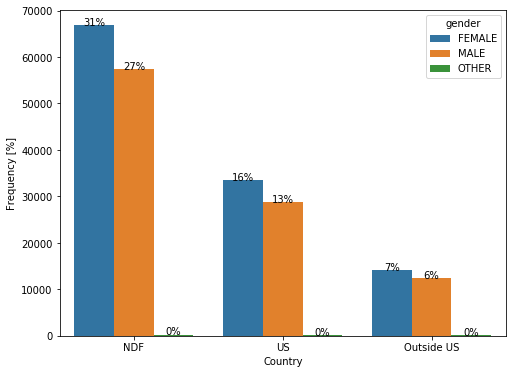

In [739]:
from matplotlib.pyplot import show
ncount=len(train['country'])
print(ncount)
plt.figure(figsize=(8,6))
ax1=sns.countplot(x='country', data=train,hue='gender')
plt.title="Destination distribution"
plt.xlabel("Country")
plt.ylabel("Frequency [%]")

for p in ax1.patches:
    height = p.get_height()
    ax1.text(x=p.get_x()+p.get_width()/2,
            y=height + 3,
            s='{:1.0f}%'.format((height/ncount)*100),
            ha="center") 
show()

Among the three group, we can conclude that female is more likely to book a trip than male, the pct is about

1.2 country vs age_group

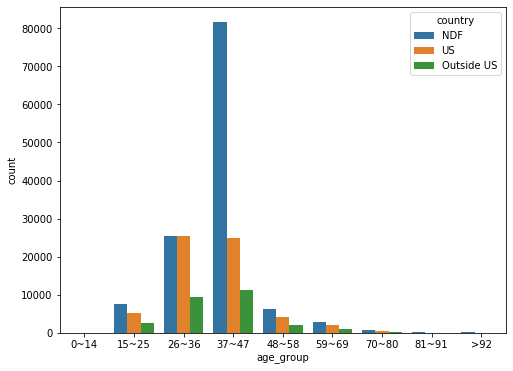

In [740]:
plt.figure(figsize=(8,6))
ax2=sns.countplot(x='age_group', data=train, hue='country')

- The age group between 26\~47 are more likely to book the trip than other age group. \
- The range of age to book a trip is from 15\~80. \
- 37\~47 age group shows an interests for the destination that is outside US. \
- We also need to figure out for 37~47 age group, it's essential to figure out what's the true value matches NDF since we can see a large number of users booked the trip in this group. 

1.3 language distribution

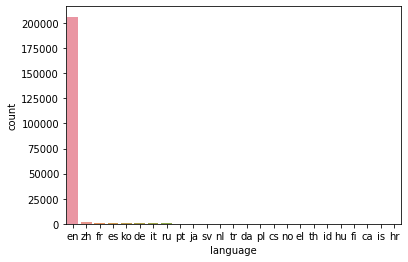

In [741]:
ax3=sns.countplot(x='language',data=train, order=train['language'].value_counts().index)

- English accounts for the most of users who booked a trip.

1.4 country vs sign_up method

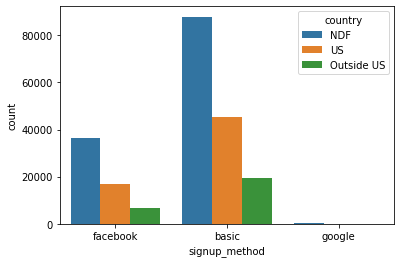

In [742]:
ax4=sns.countplot(x='signup_method', data=train,hue='country')

Basic and facebook is the most popular sign up method for all destination.

1.5 country vs affiliate provider

In [743]:
train.columns

Index(['gender', 'signup_method', 'signup_flow', 'language',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'country', 'age_group', 'affiliate_prov_group',
       'first_browser_group'],
      dtype='object')

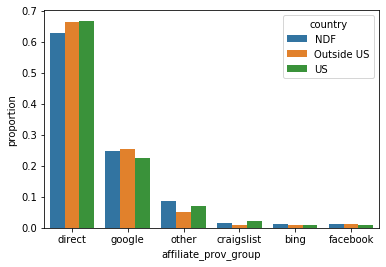

In [677]:
x, y, hue = "affiliate_prov_group", "proportion", "country"
hue_order = ["NDF", "US","Outside US"]

(train[x]
 .groupby(train[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

- Direct and google accounts most.

6. country vs signup_app

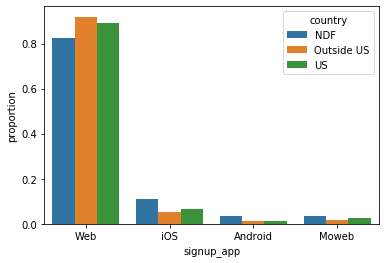

In [678]:
x, y, hue = "signup_app", "proportion", "country"
hue_order = ["NDF", "US","Outside US"]

(train[x]
 .groupby(train[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

Web accounts the most. Web-signup user acccounts for more than 80\% users who booked a trip to U.S and Outside U.S .

7. country vs first_device

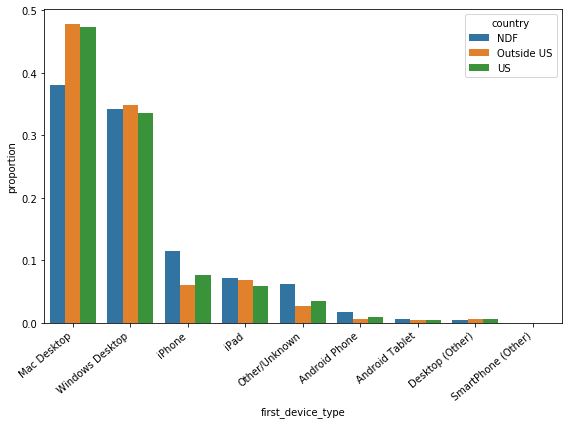

In [751]:
plt.figure(figsize=(8,6))
x, y, hue = "first_device_type", "proportion", "country"
hue_order = ["NDF", "US","Outside US"]

ax7=(train[x]
 .groupby(train[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

ax7.set_xticklabels(ax7.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()
plt.show()

Most people who use Airbnb for the first time is through MAC and Windows desktop rather than mobile devices. Follwed are iPhone and iPad.

8. country vs first_browser

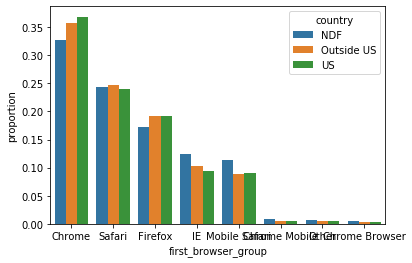

In [758]:
x, y, hue='first_browser_group','proportion','country'
hue_order=['NDF','US','Outside US']

ax8=(train[x]
    .groupby(train[hue])
    .value_counts(normalize=True)
    .rename(y)
    .reset_index()
    .pipe((sns.barplot, 'data'),x=x, y=y, hue=hue))

### Model Building 

In [759]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   gender                   213451 non-null  object  
 1   signup_method            213451 non-null  object  
 2   signup_flow              213451 non-null  int64   
 3   language                 213451 non-null  object  
 4   affiliate_provider       213451 non-null  object  
 5   first_affiliate_tracked  207386 non-null  object  
 6   signup_app               213451 non-null  object  
 7   first_device_type        213451 non-null  object  
 8   country                  213451 non-null  object  
 9   age_group                213425 non-null  category
 10  affiliate_prov_group     213451 non-null  object  
 11  first_browser_group      213451 non-null  object  
dtypes: category(1), int64(1), object(10)
memory usage: 18.1+ MB
